In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sys
sys.path.append("../../diffusion_models/")
from utils.datasets import FastMRIBrainTrain, FastMRIBrainKSpace
from torch.utils.data import DataLoader
from mri_forward.fft import to_kspace, to_imgspace
from utils.helpers import complex_to_2channelfloat
import torch
from torch.fft import fft2, ifft2, fftshift, ifftshift, fftn, ifftn
from torchvision.transforms.functional import InterpolationMode, resize

root = "/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train"

torch.float32 torch.Size([1, 2, 256, 256]) torch.float32 torch.Size([1, 1, 256, 256])


Text(0.5, 1.0, 'RSS reconstruction')

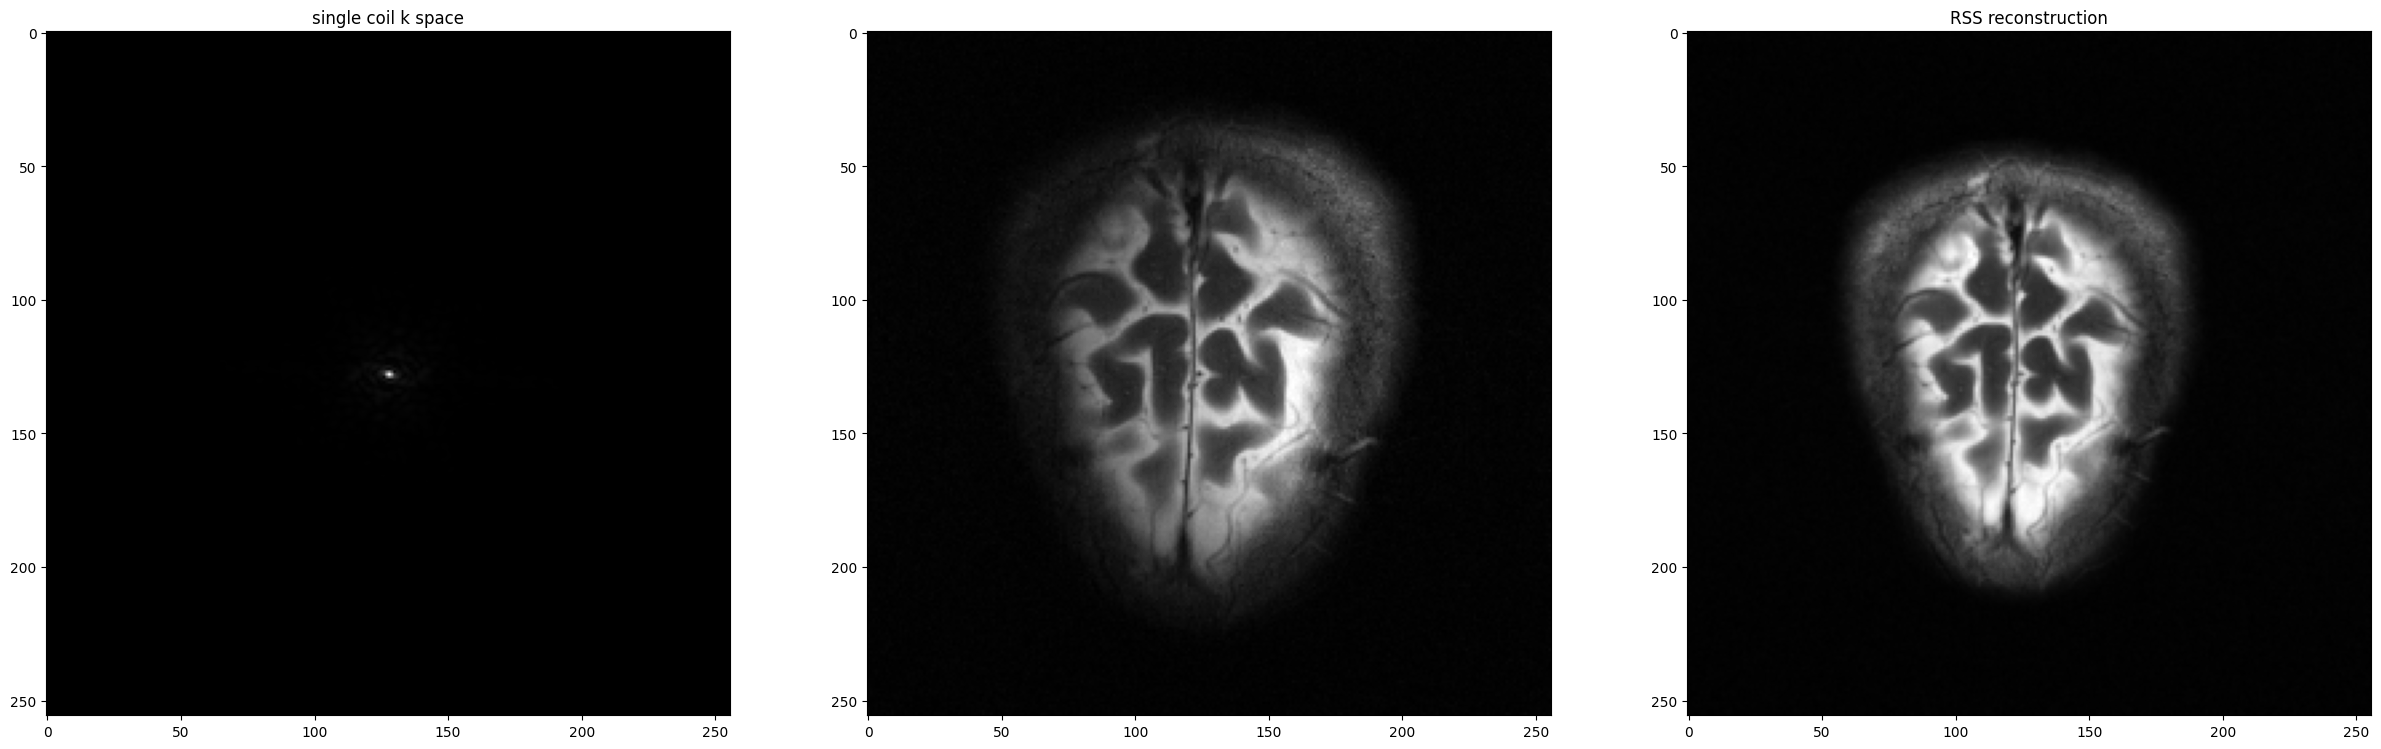

In [3]:
ds = FastMRIBrainKSpace("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=256, kspace_interpolation=InterpolationMode.BILINEAR, antialias=False)
dl = DataLoader(ds, batch_size=16, shuffle=True)
x, y = next(iter(dl))
print(x.dtype, x.shape, y.dtype, y.shape)
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(torch.norm(x[0], dim=0), cmap="gray")
ax[0].set_title("single coil k space")
dummy = torch.view_as_complex(x[0].permute(1,2,0).contiguous())
dummy = ifftn(dummy, norm="ortho", dim=(0,1))
ax[1].imshow(torch.abs(dummy), cmap="gray")
ax[2].imshow(torch.norm(y[0], dim=0), cmap="gray")
ax[2].set_title("RSS reconstruction")

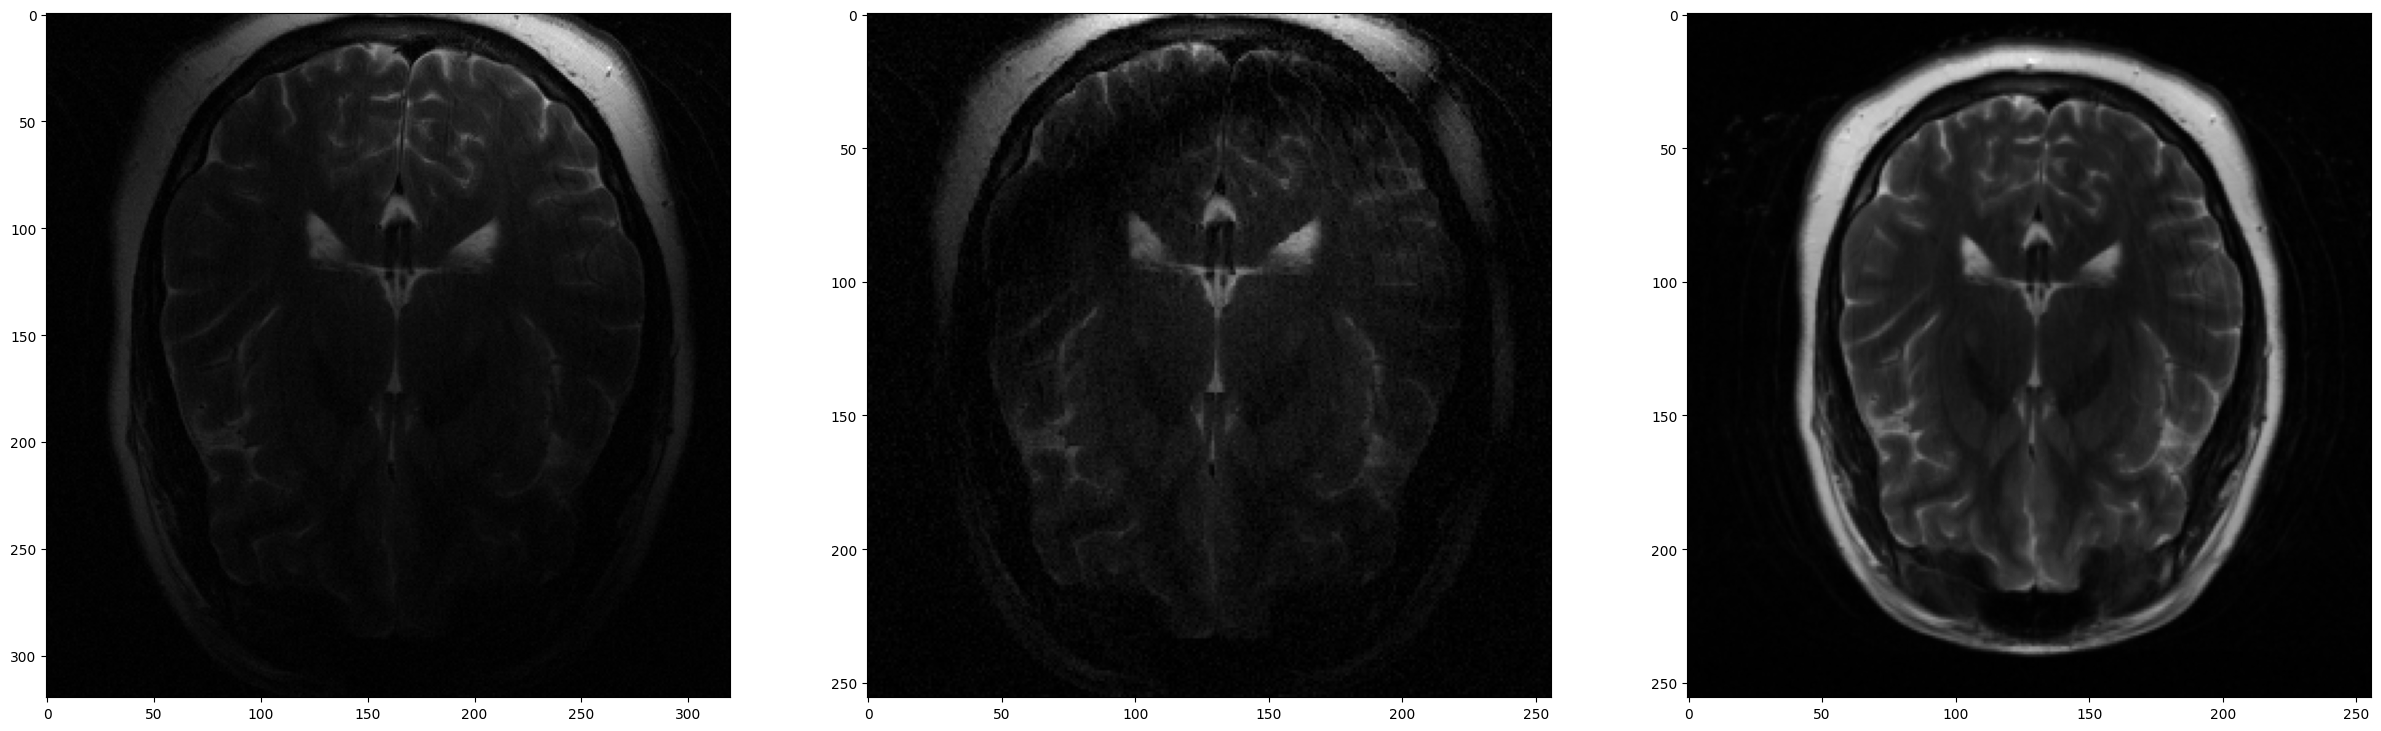

In [6]:
ds = FastMRIBrainKSpace("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=256, kspace_interpolation=InterpolationMode.NEAREST_EXACT, antialias=False)
dl = DataLoader(ds, batch_size=1, shuffle=True)
orig, resized, y = next(iter(dl))
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(torch.norm(orig[0], dim=0), cmap="gray")
ax[1].imshow(torch.norm(resized[0], dim=0), cmap="gray")
ax[2].imshow(y[0,0], cmap="gray")

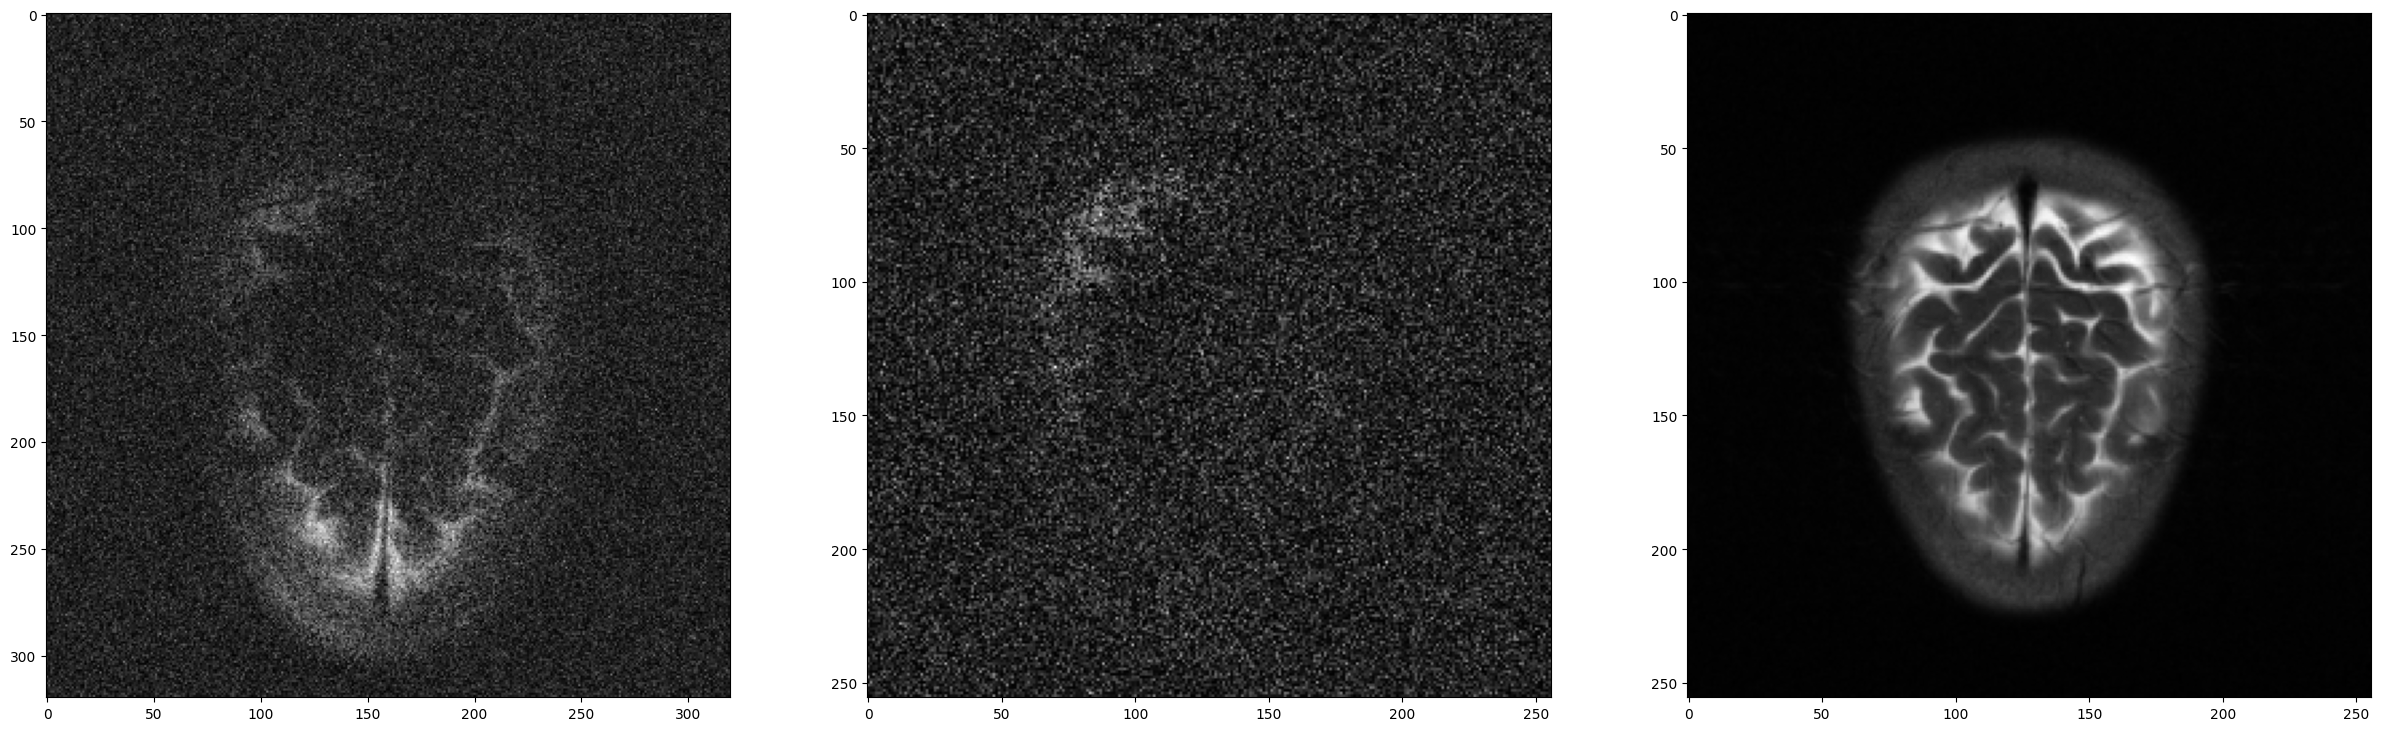

In [12]:
ds = FastMRIBrainKSpace("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=256, kspace_interpolation=InterpolationMode.NEAREST, antialias=False)
dl = DataLoader(ds, batch_size=1, shuffle=True)
orig, resized, y = next(iter(dl))
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(torch.norm(orig[0], dim=0), cmap="gray")
ax[1].imshow(torch.norm(resized[0], dim=0), cmap="gray")
ax[2].imshow(y[0,0], cmap="gray")

In [ ]:
from PIL import Image

img = Image(img.permute(1,2,0))

In [ ]:
dist = []
for file in h5_files:
    file = h5py.File(file, 'r')
    data = file["kspace"]
    dummy = [data.shape[1] for _ in range(data.shape[0])]
    dist.extend(dummy)
    file.close()
unique, counts = np.unique(np.array(dist, dtype=int), return_counts=True)
D = {unique: counts for unique, counts in zip(unique, counts)}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title("Distribution of Coils in Dataset")
plt.xticks(range(len(D)), list(D.keys()))

([<matplotlib.axis.XTick at 0x7f1118e80b90>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '8'),
  Text(5, 0, '10'),
  Text(6, 0, '12'),
  Text(7, 0, '14'),
  Text(8, 0, '16'),
  Text(9, 0, '18'),
  Text(10, 0, '20'),
  Text(11, 0, '22'),
  Text(12, 0, '24'),
  Text(13, 0, '28')])

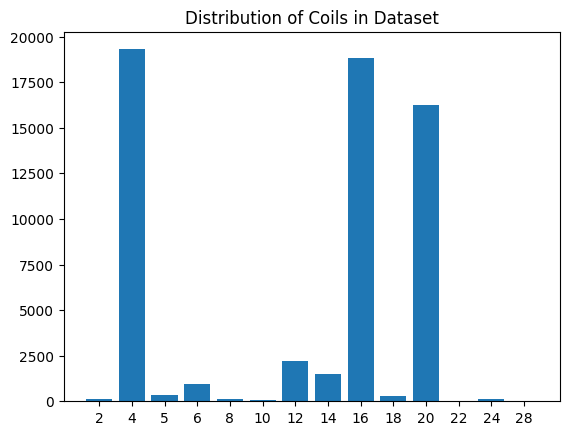

In [3]:
dist = []
for file in h5_files:
    file = h5py.File(file, 'r')
    data = file["kspace"]
    dummy = [data.shape[1] for _ in range(data.shape[0])]
    dist.extend(dummy)
    file.close()
unique, counts = np.unique(np.array(dist, dtype=int), return_counts=True)
D = {unique: counts for unique, counts in zip(unique, counts)}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title("Distribution of Coils in Dataset")
plt.xticks(range(len(D)), list(D.keys()))